# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [6]:
import os
import keras

from keras import optimizers
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """

    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
optimizers = [optimizers.SGD, optimizers.RMSprop, optimizers.Adagrad, optimizers.Adam]

In [13]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    
    for optimization_method in optimizers:
        
        print("Using Optimizer: ", optimization_method)
        
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = optimization_method()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-lr-%s" % str(lr) + 'with' + str(optimization_method)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}



Experiment with LR = 0.100000
Using Optimizer:  <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epo

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.4670 - acc: 0.2145 - val_loss: 2.0584 - val_acc: 0.2396
Epoch 2/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8938 - acc: 0.3134 - val_loss: 1.8415 - val_acc: 0.3187
Epoch 3/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.7853 - acc: 0.3578 - val_loss: 1.8422 - val_acc: 0.3364
Epoch 4/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.7158 - acc: 0.3857 - val_loss: 1.6806 - val_acc: 0.3920
Epoch 5/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.6607 - acc: 0.4062 - val_loss: 1.6374 - val_acc: 0.4141
Epoch 6/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.6166 - acc: 0.4221 - val_loss: 1.6112 - val_acc: 0.4168
Epoch 7/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5760 - acc: 0.4386 - val_loss: 1.

50000/50000 [==============================] - 10s 194us/step - loss: 14.4538 - acc: 0.0992 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 190us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 10s 197us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 186us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 185us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 188us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=====

50000/50000 [==============================] - 14s 286us/step - loss: 1.9337 - acc: 0.3024 - val_loss: 1.7687 - val_acc: 0.3753
Epoch 2/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.7080 - acc: 0.3891 - val_loss: 1.6922 - val_acc: 0.3899
Epoch 3/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.6207 - acc: 0.4222 - val_loss: 1.6069 - val_acc: 0.4219
Epoch 4/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.5645 - acc: 0.4416 - val_loss: 1.5407 - val_acc: 0.4584
Epoch 5/50
50000/50000 [==============================] - 16s 310us/step - loss: 1.5009 - acc: 0.4643 - val_loss: 1.5285 - val_acc: 0.4563
Epoch 6/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.4692 - acc: 0.4765 - val_loss: 1.5348 - val_acc: 0.4499
Epoch 7/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.4383 - acc: 0.4871 - val_loss: 1.4627 - val_acc: 0.4835
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 8s 168us/step - loss: 2.0922 - acc: 0.2503 - val_loss: 1.9918 - val_acc: 0.2568
Epoch 2/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.9010 - acc: 0.3333 - val_loss: 1.8946 - val_acc: 0.3355
Epoch 3/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.8337 - acc: 0.3556 - val_loss: 1.8252 - val_acc: 0.3599
Epoch 4/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7834 - acc: 0.3718 - val_loss: 1.7970 - val_acc: 0.3523
Epoch 5/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7467 - acc: 0.3845 - val_loss: 1.7636 - val_acc: 0.3795
Epoch 6/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.7142 - acc: 0.3989 - val_loss: 1.6971 - val_acc: 0.4058
Epoch 7/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.6892 - acc: 0.4065 - val_loss: 1.7405 - val_acc: 0.3703
Epoch 8/50
50000/50000 [====================

50000/50000 [==============================] - 11s 229us/step - loss: 1.8811 - acc: 0.3204 - val_loss: 1.9659 - val_acc: 0.3171
Epoch 3/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.7821 - acc: 0.3604 - val_loss: 1.8754 - val_acc: 0.3353
Epoch 4/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.7078 - acc: 0.3868 - val_loss: 1.7251 - val_acc: 0.3743
Epoch 5/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.6491 - acc: 0.4101 - val_loss: 1.6708 - val_acc: 0.3960
Epoch 6/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.6044 - acc: 0.4267 - val_loss: 1.6985 - val_acc: 0.4045
Epoch 7/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.5661 - acc: 0.4417 - val_loss: 1.5634 - val_acc: 0.4347
Epoch 8/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5302 - acc: 0.4544 - val_loss: 1.7470 - val_acc: 0.3839
Epoch 9/50
50000/50000 [==============

Epoch 3/50
50000/50000 [==============================] - 10s 192us/step - loss: 14.5090 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 10s 192us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 192us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 11s 213us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 10s 194us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 10s 194us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
5

50000/50000 [==============================] - 14s 283us/step - loss: 1.6047 - acc: 0.4264 - val_loss: 1.5661 - val_acc: 0.4419
Epoch 4/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.5484 - acc: 0.4465 - val_loss: 1.5374 - val_acc: 0.4497
Epoch 5/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.4973 - acc: 0.4676 - val_loss: 1.4889 - val_acc: 0.4691
Epoch 6/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.4633 - acc: 0.4790 - val_loss: 1.4888 - val_acc: 0.4688
Epoch 7/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.4254 - acc: 0.4936 - val_loss: 1.4458 - val_acc: 0.4818
Epoch 8/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.4005 - acc: 0.5003 - val_loss: 1.4635 - val_acc: 0.4793
Epoch 9/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.3784 - acc: 0.5071 - val_loss: 1.4240 - val_acc: 0.4969
Epoch 10/50
50000/50000 [=============

50000/50000 [==============================] - 8s 164us/step - loss: 1.8272 - acc: 0.3535 - val_loss: 1.8774 - val_acc: 0.3229
Epoch 4/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.7800 - acc: 0.3739 - val_loss: 1.8100 - val_acc: 0.3610
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7412 - acc: 0.3888 - val_loss: 1.8146 - val_acc: 0.3447
Epoch 6/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.7097 - acc: 0.4006 - val_loss: 1.6925 - val_acc: 0.4031
Epoch 7/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6833 - acc: 0.4111 - val_loss: 1.7071 - val_acc: 0.4053
Epoch 8/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.6565 - acc: 0.4177 - val_loss: 1.6918 - val_acc: 0.3931
Epoch 9/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.6363 - acc: 0.4249 - val_loss: 1.7085 - val_acc: 0.3897
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 10s 207us/step - loss: 1.7158 - acc: 0.3870 - val_loss: 1.6687 - val_acc: 0.4073
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.6524 - acc: 0.4111 - val_loss: 1.6848 - val_acc: 0.4003
Epoch 6/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.6080 - acc: 0.4258 - val_loss: 1.7737 - val_acc: 0.3700
Epoch 7/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5713 - acc: 0.4401 - val_loss: 1.5934 - val_acc: 0.4308
Epoch 8/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5381 - acc: 0.4529 - val_loss: 1.6089 - val_acc: 0.4313
Epoch 9/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.5039 - acc: 0.4660 - val_loss: 1.5720 - val_acc: 0.4399
Epoch 10/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.4801 - acc: 0.4739 - val_loss: 1.6025 - val_acc: 0.4452
Epoch 11/50
50000/50000 [============

50000/50000 [==============================] - 9s 188us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 201us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 189us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 196us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 10s 195us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 10s 190us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [=

50000/50000 [==============================] - 14s 275us/step - loss: 1.5416 - acc: 0.4495 - val_loss: 1.6125 - val_acc: 0.4237
Epoch 5/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.4978 - acc: 0.4665 - val_loss: 1.4820 - val_acc: 0.4673
Epoch 6/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.4496 - acc: 0.4857 - val_loss: 1.4813 - val_acc: 0.4740
Epoch 7/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.4312 - acc: 0.4880 - val_loss: 1.5228 - val_acc: 0.4516
Epoch 8/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.3976 - acc: 0.5016 - val_loss: 1.4502 - val_acc: 0.4860
Epoch 9/50
50000/50000 [==============================] - 15s 297us/step - loss: 1.3732 - acc: 0.5125 - val_loss: 1.4164 - val_acc: 0.4921
Epoch 10/50
50000/50000 [==============================] - 15s 310us/step - loss: 1.3341 - acc: 0.5277 - val_loss: 1.4550 - val_acc: 0.4807
Epoch 11/50
50000/50000 [============

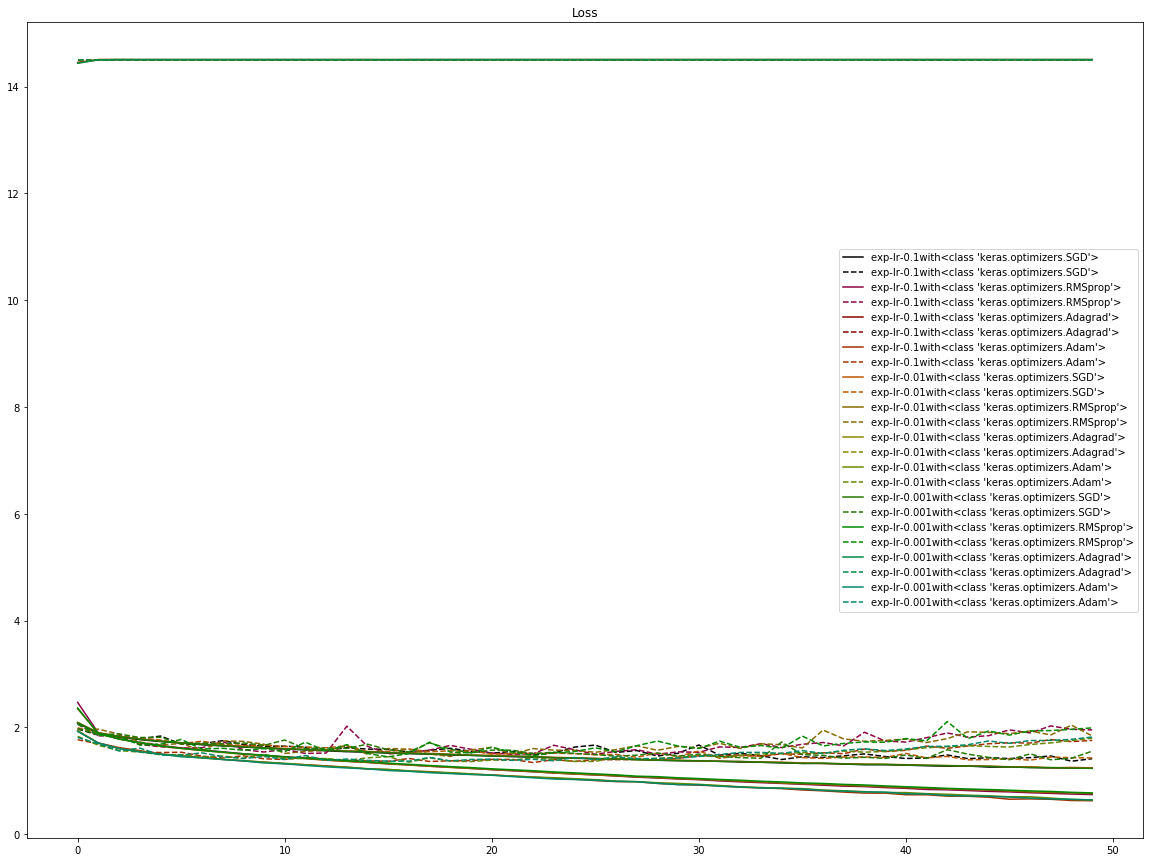

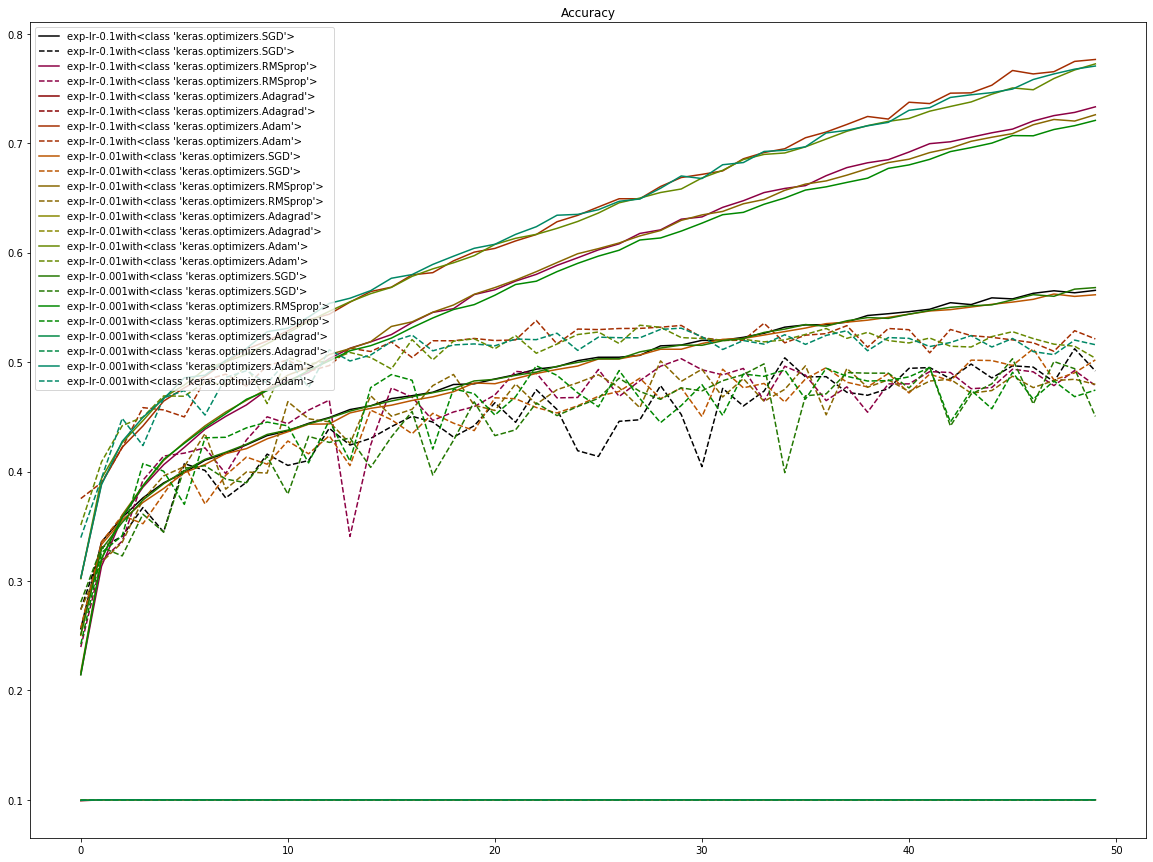

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar =  ["#000000", "#8C0044", "#880000", "#A42D00", "#BB5500", "#886600", "#888800", "#668800", "#227700", "#008800", "#008844", "#008866", "#008888"]


plt.figure(figsize=(20,15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20,15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()